# Shear Wave Splitting for the Novice

When a shear wave encounters an anisotropic medium, it splits its energy into orthogonally polarised wave sheets.  The effect is easily measured on waveforms with -- at least -- 2-component data (provided those 2 components are orthogonal to the wavefront vector, which can be different from the ray vector).  The key parameters are the polarisation of the wave fronts (which is captured by the parameter, $\phi$, which ca be defined as a vector in 3 dimensions, but in practice).  This angle is measured relative to some well-defined direction, e.g. North, or upwards, in the plane normal to the wave prop



## Splitting the signal

Let's start with two components. Put a pulse of energy and some noise on these components, with a polarisation of 40 degrees.  Note the pulse of energy is centred in the middle of the trace -- this is deliberate -- it is a feature of this software that analysis is always done at the centre of traces.

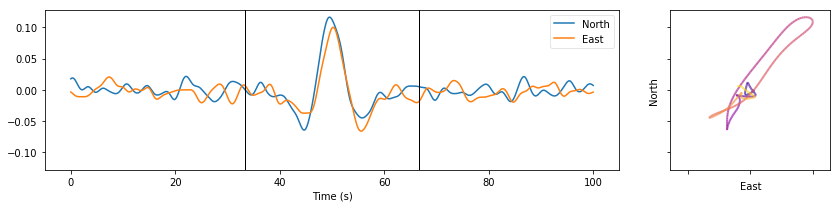

In [57]:
import sys
sys.path.append("..")
import splitwavepy as sw

import matplotlib.pyplot as plt
import numpy as np

data = sw.Pair(noise=0.05,pol=40,delta=0.1)
data.plot()
plt.show()

Now let's add a bit of splitting. Note, this shortens trace length slightly.  And the pulse is still at the centre.

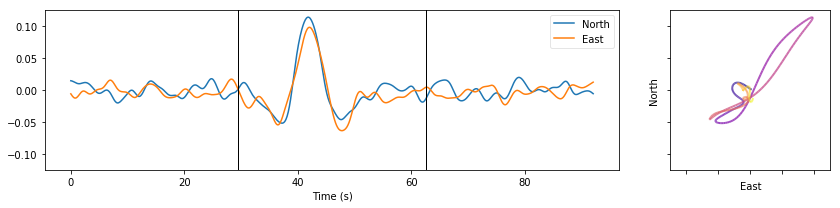

In [62]:
data.split(40,1.6)
data.plot()

Measuring shear wave splitting involves searching for the splitting parameters that, when removed from the data, best linearise the particle motion.  We know the splitting parameters so no need to search.  Let's just confirm that when we undo the splitting we get linearised particle motion.  Again, this shortens the trace, and the pulse is still at the centre.

<bound method Window.asarray of <splitwavepy.core.window.Window instance at 0x7fbbec0cd6c8>>

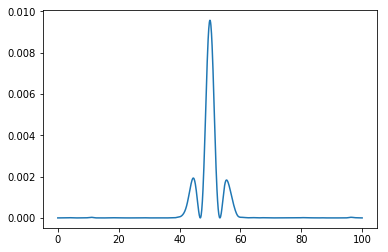

In [31]:
#data.unsplit(80,1.6)
#data.plot()

x2,y2 = data.power()
plt.plot(data.t(),y2)
data.window.asarray

## The window

The window should capture the power in the pulse of arriving energy in such a way as to maximise the signal to noise ratio.  It should also be wide enough to account for pulse broadening when splitting operators are applied to the data.


AttributeError: Window instance has no __call__ method

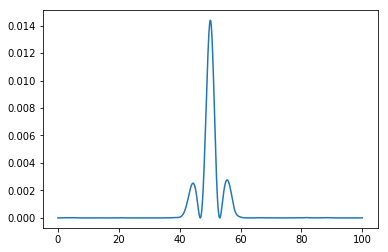

In [25]:
# Let's start afresh, and this time put the splitting on straight away.
data = sw.Pair(delta=0.1,noise=0.01,pol=40,fast=80,lag=1.2)

# plot power in signal
fig, ax1 = plt.subplots()
ax1.plot(data.t(),data.power()[0])
# generate a window
window = data.window(25,12,tukey=0.1)
# window = sw.Window(data.centre(),150)
ax2 = ax1.twinx()
ax2.plot(data.t(),window.asarray(data.t().size),'r')
plt.show()
        
data.plot(window=window)

ValueError: x and y must have same first dimension, but have shapes (1001,) and (2, 1001)

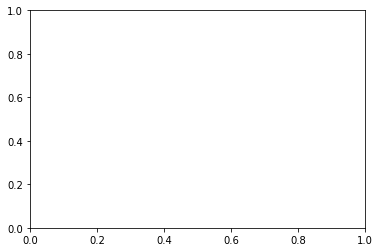

In [9]:
# Now repreat but this time apply loads of splitting and see the energy broaden
data = sw.Pair(delta=0.1,noise=0.01,pol=40,fast=80,lag=5.2)

# plot power in signal
fig, ax1 = plt.subplots()
ax1.plot(data.t(),data.power())
# generate a window
window = data.window(25,12,tukey=0.1)
# window = sw.Window(data.centre(),150)
ax2 = ax1.twinx()
ax2.plot(data.t(),window.asarray(data.t().size),'r')
plt.show()
        
data.plot(window=window)

# large window
largewindow = data.window(23,24,tukey=0.1)
data.plot(window=largewindow)

## The measurement



<bound method EigenM.ni of <splitwavepy.measure.eigenM.EigenM instance at 0x7fbbea1115f0>>


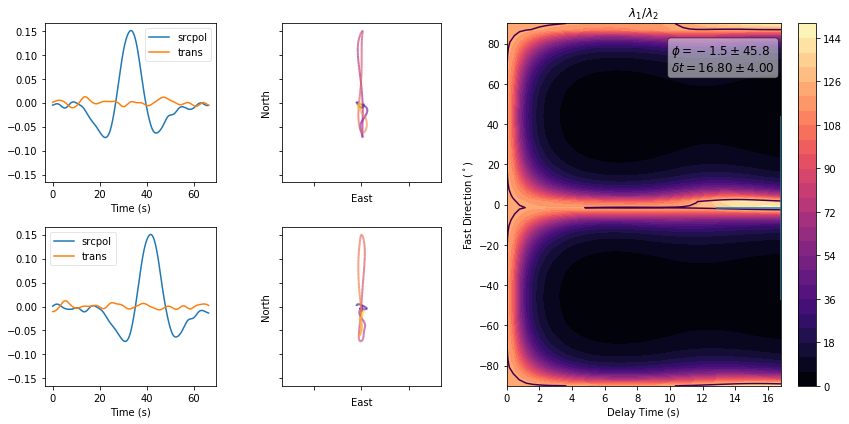

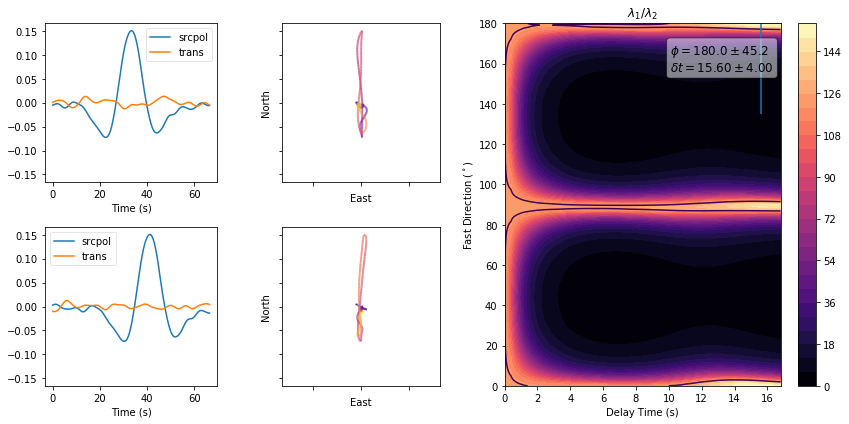

In [66]:
# sparse search

tlags = np.linspace(0,7.0,60)
degs = np.linspace(-90,90,60)
print(M.c)
M = sw.EigenM(tlags=tlags,degs=degs,noise=0.03,fast=112,lag=5.3,delta=0.2)
M.plot()


# dense search

tlags = np.linspace(0.,7.0,200)
degs = np.linspace(0,180,200)
M = sw.EigenM(M.data,tlags=tlags,degs=degs)
M.plot()

In [7]:
M.tlags

array([[ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0.4,  0.4,  0.4, ...,  0.4,  0.4,  0.4],
       [ 0.8,  0.8,  0.8, ...,  0.8,  0.8,  0.8],
       ..., 
       [ 6.4,  6.4,  6.4, ...,  6.4,  6.4,  6.4],
       [ 6.8,  6.8,  6.8, ...,  6.8,  6.8,  6.8],
       [ 7.2,  7.2,  7.2, ...,  7.2,  7.2,  7.2]])

/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


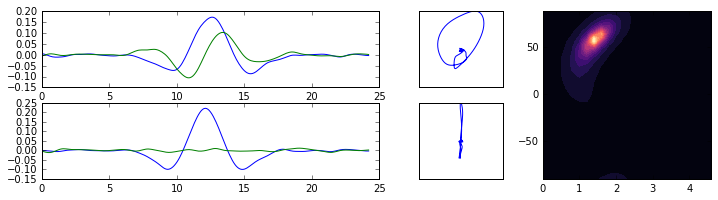

In [8]:
M = sw.EigenM(delta=0.1,noise=0.02,fast=60,lag=1.3)
M.plot()

In [9]:
np.linspace(0,0.5,15)

array([ 0.        ,  0.03571429,  0.07142857,  0.10714286,  0.14285714,
        0.17857143,  0.21428571,  0.25      ,  0.28571429,  0.32142857,
        0.35714286,  0.39285714,  0.42857143,  0.46428571,  0.5       ])

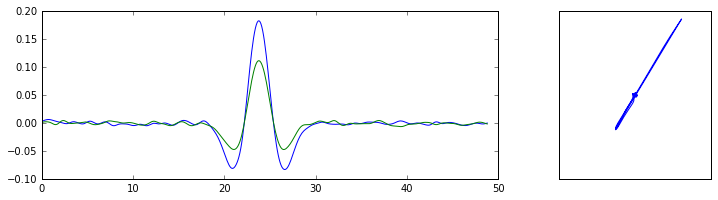

In [14]:
p = sw.Pair(delta=0.1,pol=30,fast=30,lag=1.2,noise=0.01)
p.plot()

In [15]:
p.angle

0.0